# Project - Term Deposit Sale


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)
sns.set_style(style='darkgrid') #Update default background style of plots

pd.options.display.float_format = '{:,.2f}'.format #Display all numbers with 2 decimal points

from sklearn.model_selection import train_test_split
from sklearn import metrics

#ML model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
df = pd.read_csv("bank-full.csv")
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

### Print the descriptive statistics of each & every column using describe() function

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [8]:
# Convert age into age range (bins) and converting it into a categorical variable.

bin_edges = [10, 20, 30, 40, 50, 60, 100]       
bin_labels = ['10-20', '20-30','30-40', '40-50', '50-60','60-100']  
#bin_labels = [1,2,3,4,5,6]  

df['age_range'] = pd.cut(df['age'], bins=bin_edges , labels=bin_labels).astype('category')
df.drop('age',axis=1,inplace=True)

df['age_range'].value_counts(normalize=True)
#df['age_range'] = df['age_range'].cat.codes  # will be converting into categorical codes after plotting graphs
#df

30-40    0.39
40-50    0.25
50-60    0.18
20-30    0.15
60-100   0.03
10-20    0.00
Name: age_range, dtype: float64

In [9]:
# Converting pdays into months & converting it into a categorical variable each of 2 months.

mapping = {-1:910}  #Converting all values above 900 days (-1) into 910, so it can be categorized into a bucket
df['pdays'] = df['pdays'].replace(mapping)

bin_edges = [0,60,120, 180,240,300,360,420,960]
bin_labels = ['0-60','60-120','120-180','180-240','240-300','300-360','360-420','>420']        
df['pdays_range'] = pd.cut(df['pdays'], bins=bin_edges , labels=bin_labels)

df.drop('pdays',axis=1,inplace=True)
df['pdays_range'].value_counts(normalize=True)
#df['pdays_range'] = df['pdays_range'].cat.codes # will be converting into categorical codes after plotting graphs
#df

>420      0.82
60-120    0.04
300-360   0.03
180-240   0.03
120-180   0.03
240-300   0.03
360-420   0.01
0-60      0.01
Name: pdays_range, dtype: float64

In [10]:
#Balance field is higly skewed and has lots of outliers. So, converting it into bins.
bin_edges = [-10000,0,5000, 10000,100000]
bin_labels = ['<0','0-5000','5000-10000','>10000']        
df['balance_range'] = pd.cut(df['balance'], bins=bin_edges , labels=bin_labels)

df.drop('balance',axis=1,inplace=True)

df['balance_range'].value_counts()



0-5000        35086
<0             7280
5000-10000     2016
>10000          828
Name: balance_range, dtype: int64

In [11]:
# Converting poutcome other to unknown category
mapping = {'other':'unknown'}
df['poutcome']=df['poutcome'].replace(mapping)

print(df['poutcome'].value_counts(normalize=True))

# Since 86% of values for field poutcome is unknown, so dropping this field

df.drop('poutcome',axis=1,inplace=True)


unknown   0.86
failure   0.11
success   0.03
Name: poutcome, dtype: float64


In [12]:
# Converting education unknown to primary category
mapping = {'unknown':'primary'}
df['education']=df['education'].replace(mapping)

df['education'].value_counts(normalize=True)

secondary   0.51
tertiary    0.29
primary     0.19
Name: education, dtype: float64

In [13]:
#Converting default, housing, loan and target to categorical variables with value 0/1

mapping = {'yes':1,'no':0}


df['default']=df['default'].replace(mapping)
df['housing']=df['housing'].replace(mapping)
df['loan']=df['loan'].replace(mapping)
df['Target']=df['Target'].replace(mapping)

In [14]:
#Converting job to values "Employed" & "Unemployed"

for i in ['management','technician','entrepreneur','blue-collar','admin.','services','self-employed']:
    mapping = {i:'employed'}
    df['job'] = df['job'].replace(mapping)

for i in ['housemaid','retired','student','unknown']:
    mapping = {i:'unemployed'}
    df['job'] = df['job'].replace(mapping)
    
df['job'].value_counts()

employed      39178
unemployed     6033
Name: job, dtype: int64

In [15]:
# Converting month into Categorical value and dropping day
mapping = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month'] = df['month'].replace(mapping)
df.drop(['day'],axis=1,inplace=True)

In [16]:
# for Contact field 29% is unknown & remaining all is cellular. Dropping this field as its not adding much significance.
print(df['contact'].value_counts(normalize=True))

df.drop(['contact'],axis=1,inplace=True)

cellular    0.65
unknown     0.29
telephone   0.06
Name: contact, dtype: float64


In [17]:
df

,job,marital,education,default,housing,loan,month,duration,campaign,previous,Target,age_range,pdays_range,balance_range
0,employed,married,tertiary,0,1,0,5,261,1,0,0,50-60,>420,0-5000
1,employed,single,secondary,0,1,0,5,151,1,0,0,40-50,>420,0-5000
2,employed,married,secondary,0,1,1,5,76,1,0,0,30-40,>420,0-5000
3,employed,married,primary,0,1,0,5,92,1,0,0,40-50,>420,0-5000
4,unemployed,single,primary,0,0,0,5,198,1,0,0,30-40,>420,0-5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,employed,married,tertiary,0,0,0,11,977,3,0,1,50-60,>420,0-5000
45207,unemployed,divorced,primary,0,0,0,11,456,2,0,1,60-100,>420,0-5000
45208,unemployed,married,secondary,0,0,0,11,1127,5,3,1,60-100,180-240,5000-10000
45209,employed,married,secondary,0,0,0,11,508,4,0,0,50-60,>420,0-5000


In [18]:
# datatype conversion to category
df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')


In [19]:
#Now all fields are either in integer or category, which will help in data analysis. 
#Later I will apply one hot encoding to categorical variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   job            45211 non-null  category
 1   marital        45211 non-null  category
 2   education      45211 non-null  category
 3   default        45211 non-null  int64   
 4   housing        45211 non-null  int64   
 5   loan           45211 non-null  int64   
 6   month          45211 non-null  int64   
 7   duration       45211 non-null  int64   
 8   campaign       45211 non-null  int64   
 9   previous       45211 non-null  int64   
 10  Target         45211 non-null  int64   
 11  age_range      45211 non-null  category
 12  pdays_range    45211 non-null  category
 13  balance_range  45210 non-null  category
dtypes: category(6), int64(8)
memory usage: 3.0 MB


#### Using univariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc.

In [20]:
# checking value counts of all categorical columns
for i in list(df.columns[df.dtypes=='object'] | df.columns[df.dtypes=='category']):   
    print(df[i].value_counts(normalize=True))
    print()

employed     0.87
unemployed   0.13
Name: job, dtype: float64

married    0.60
single     0.28
divorced   0.12
Name: marital, dtype: float64

secondary   0.51
tertiary    0.29
primary     0.19
Name: education, dtype: float64

30-40    0.39
40-50    0.25
50-60    0.18
20-30    0.15
60-100   0.03
10-20    0.00
Name: age_range, dtype: float64

>420      0.82
60-120    0.04
300-360   0.03
180-240   0.03
120-180   0.03
240-300   0.03
360-420   0.01
0-60      0.01
Name: pdays_range, dtype: float64

0-5000       0.78
<0           0.16
5000-10000   0.04
>10000       0.02
Name: balance_range, dtype: float64



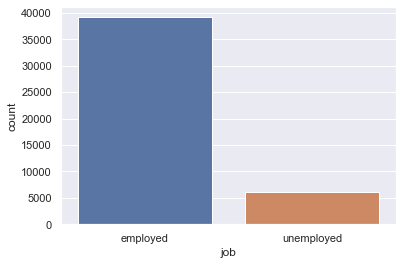

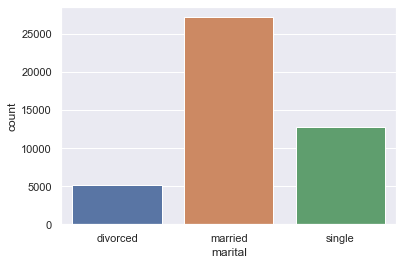

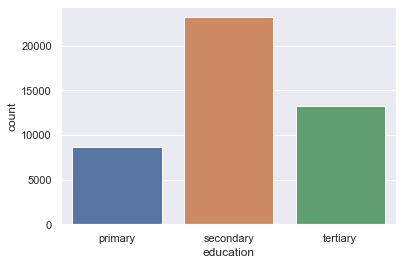

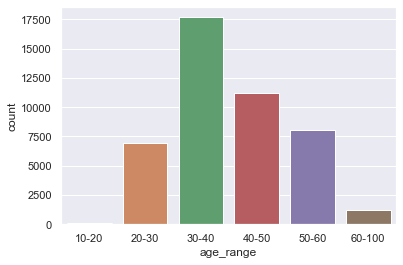

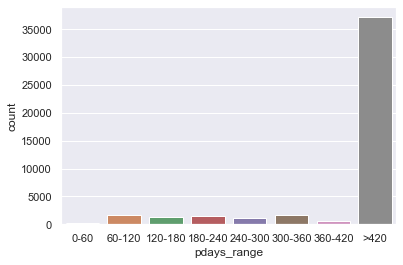

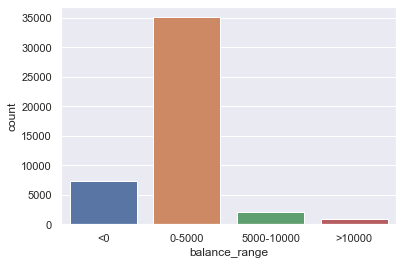

In [21]:
for i in list(df.columns[df.dtypes=='object'] | df.columns[df.dtypes=='category']):
    sns.countplot(df[i])
    plt.show()

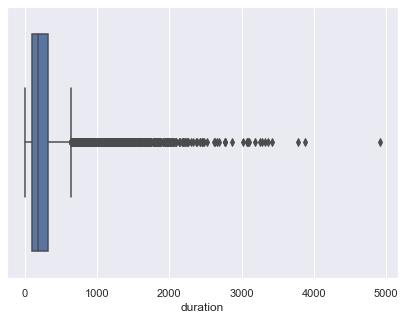

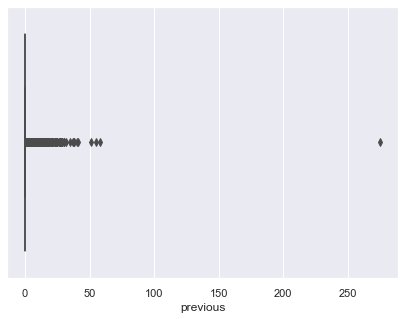

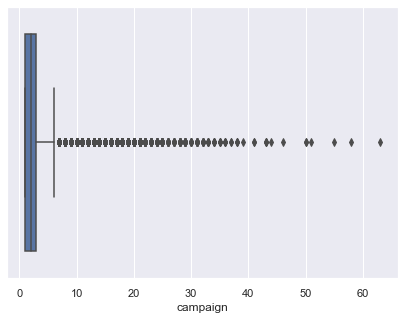

In [22]:
# Creating box plot for numerical data
for i in ['duration','previous','campaign']:
    plt.figure(figsize = (7,5))
    sns.boxplot(df[i])
    plt.show()

### Handling Outliers

In [23]:
print(df['previous'].value_counts(normalize=True).head(5))

# Value of field previous is very skewed. 82% is 0. So, dropping this field.
df.drop('previous',axis=1,inplace=True)

0   0.82
1   0.06
2   0.05
3   0.03
4   0.02
Name: previous, dtype: float64


In [24]:
df1 = df.copy()

In [25]:
# Replacing outliers by whiskers
for i in ['duration','campaign']:
    print ("Skew in df for field "+ i +" :"+ str(df[i].skew()))
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    print("Q1: "+ str(Q1) + ", Q3 :" +str(Q3) + ", IQR :"+ str(IQR))
    #df1[i].replace(df1[(df1[i] < Q1-1.5*IQR ) | (df1[i] > Q3+1.5*IQR)],IQR,inplace=True)
    df1[i] = np.where(df1[i] > Q3, Q3,df1[i])
    df1[i] = np.where(df1[i] < Q1, Q1,df1[i])
    print ("Skew in df1 after removing outliers for field "+ i +" :"+ str(df1[i].skew()))

Skew in df for field duration :3.144318099423456
Q1: 103.0, Q3 :319.0, IQR :216.0
Skew in df1 after removing outliers for field duration :0.25707393018451163
Skew in df for field campaign :4.898650166179674
Q1: 1.0, Q3 :3.0, IQR :2.0
Skew in df1 after removing outliers for field campaign :0.10031025929176021


In [26]:
df['campaign'].value_counts(normalize=True).head(5)

1   0.39
2   0.28
3   0.12
4   0.08
5   0.04
Name: campaign, dtype: float64

### descriptive statistics after removing outliers

In [27]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,"45,211.00",0.02,0.13,0.00,0.00,0.00,0.00,1.00
housing,"45,211.00",0.56,0.50,0.00,0.00,1.00,1.00,1.00
loan,"45,211.00",0.16,0.37,0.00,0.00,0.00,0.00,1.00
month,"45,211.00",6.14,2.41,1.00,5.00,6.00,8.00,12.00
duration,"45,211.00",200.39,87.71,103.00,103.00,180.00,319.00,319.00
campaign,"45,211.00",1.95,0.85,1.00,1.00,2.00,3.00,3.00
Target,"45,211.00",0.12,0.32,0.00,0.00,0.00,0.00,1.00


### Multivariate analysis

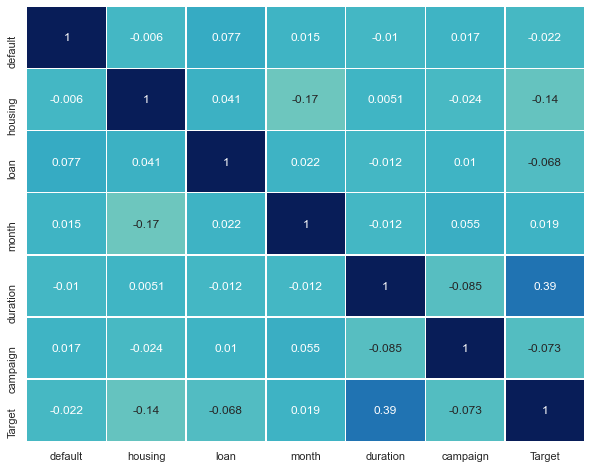

In [28]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

#### Inference from Correlation heat map -
Looks like not much correlation is there among numeric fields. Only field duration is little related to Target.

### Bivariate Analysis - Relation between Target and other categorical fields

Target       0    1
age_range          
10-20     0.66 0.34
20-30     0.84 0.16
30-40     0.90 0.10
40-50     0.91 0.09
50-60     0.90 0.10
60-100    0.58 0.42


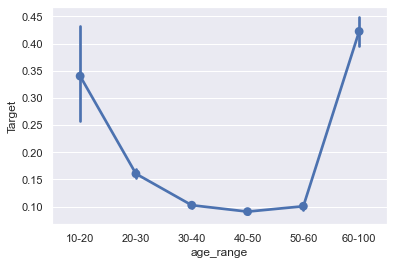

In [29]:
print(pd.crosstab(df1['age_range'],df['Target'],normalize='index'))
sns.pointplot(df1['age_range'],df1['Target']);

Target           0    1
balance_range          
<0            0.93 0.07
0-5000        0.88 0.12
5000-10000    0.85 0.15
>10000        0.84 0.16


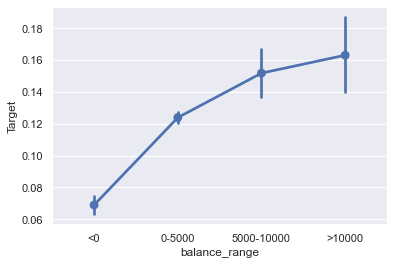

In [30]:
print(pd.crosstab(df1['balance_range'],df['Target'],normalize='index'))
sns.pointplot(df1['balance_range'],df1['Target']);

Target         0    1
pdays_range          
0-60        0.77 0.23
60-120      0.59 0.41
120-180     0.84 0.16
180-240     0.66 0.34
240-300     0.88 0.12
300-360     0.91 0.09
360-420     0.85 0.15
>420        0.91 0.09


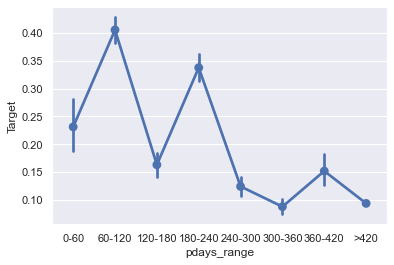

In [31]:
print(pd.crosstab(df1['pdays_range'],df['Target'],normalize='index'))
sns.pointplot(df1['pdays_range'],df1['Target']);

Target       0    1
education          
primary   0.90 0.10
secondary 0.89 0.11
tertiary  0.85 0.15


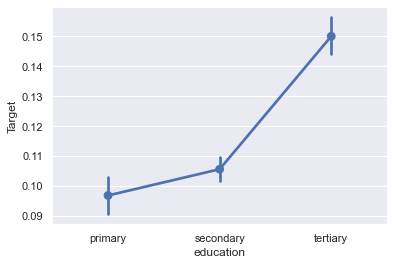

In [32]:
print(pd.crosstab(df1['education'],df['Target'],normalize='index'))
sns.pointplot(df1['education'],df1['Target']);

Target        0    1
job                 
employed   0.89 0.11
unemployed 0.81 0.19


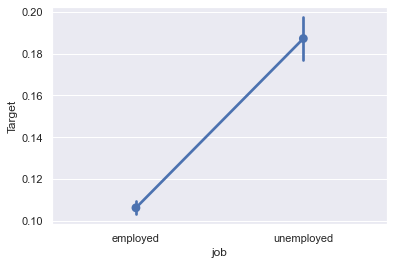

In [33]:
print(pd.crosstab(df1['job'],df['Target'],normalize='index'))
sns.pointplot(df1['job'],df1['Target']);

Target      0    1
marital           
divorced 0.88 0.12
married  0.90 0.10
single   0.85 0.15


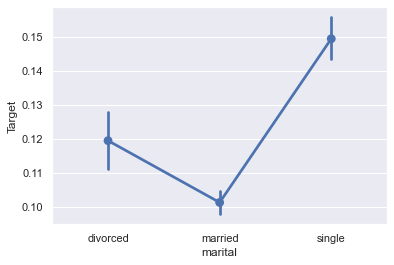

In [34]:
print(pd.crosstab(df1['marital'],df['Target'],normalize='index'))
sns.pointplot(df1['marital'],df1['Target']);

### Inference from bivariate analysis -
1) People with age of more than 60 & less than 20, are more likely to subscribe for term deposit. <br />  2) Balance Range is directly related to Target. People with more balance in account are more likely to subscribe for term deposit. <br />
3) Looks like no definite relation between pdays and Target. <br />
4) Education is directly related to Target. People with more education are more likely to subscribe for term deposit. <br />
5) Unemployed people are more likely to subscribe for term deposit. <br />
6) Divorced and Single are more likely to subscribe for term deposit than Married. <br />

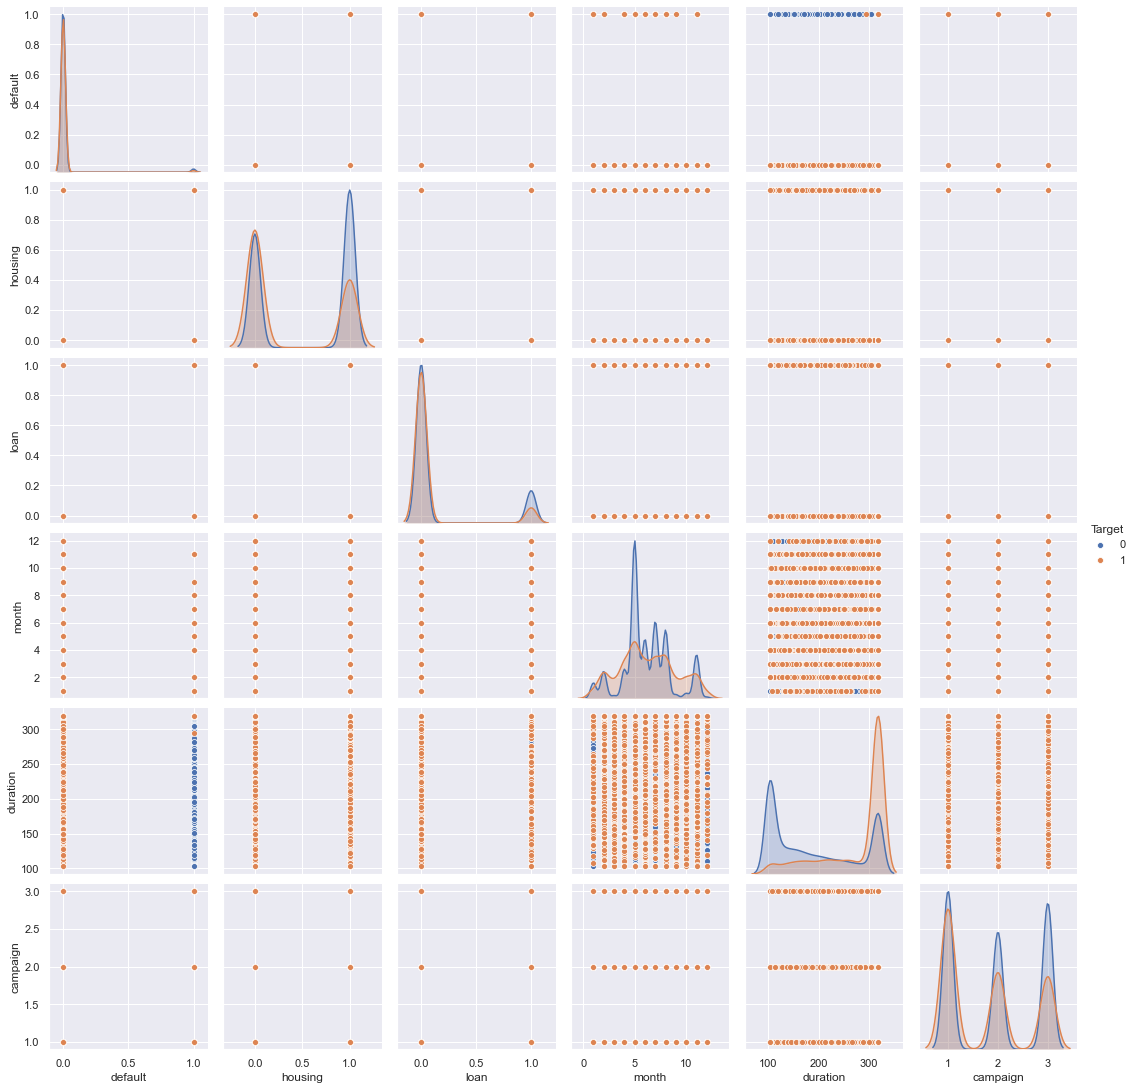

In [35]:
sns.pairplot(df1, hue = 'Target')

### Convert age range & pdays range into categorical codes (integer)

In [36]:
df1['age_range'] = df1['age_range'].cat.codes
df1['pdays_range'] = df1['pdays_range'].cat.codes
df1['balance_range'] = df1['balance_range'].cat.codes

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   job            45211 non-null  category
 1   marital        45211 non-null  category
 2   education      45211 non-null  category
 3   default        45211 non-null  int64   
 4   housing        45211 non-null  int64   
 5   loan           45211 non-null  int64   
 6   month          45211 non-null  int64   
 7   duration       45211 non-null  float64 
 8   campaign       45211 non-null  float64 
 9   Target         45211 non-null  int64   
 10  age_range      45211 non-null  int8    
 11  pdays_range    45211 non-null  int8    
 12  balance_range  45211 non-null  int8    
dtypes: category(3), float64(2), int64(5), int8(3)
memory usage: 2.7 MB


In [38]:
df1['balance_range'].value_counts()

 1    35086
 0     7280
 2     2016
 3      828
-1        1
Name: balance_range, dtype: int64

### Converting all categorical variables to integer using One-hot encoding

In [39]:
df1 = pd.get_dummies(df1)

In [40]:
df1.dtypes

default                  int64
housing                  int64
loan                     int64
month                    int64
duration               float64
campaign               float64
Target                   int64
age_range                 int8
pdays_range               int8
balance_range             int8
job_employed             uint8
job_unemployed           uint8
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
dtype: object

In [41]:
# Separate the independent attributes i.e. every column except personal loan
# Store the target column (Personal Loan) into Y array

x = df1.loc[:, df1.columns != 'Target']  # independent variables
y = df1.loc[:, df1.columns == 'Target']  # Target variable

feature_cols = x.columns

### Split into Test & Train data

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

### Model using Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=5)  #assigning a variable for the algorithm

model.fit(x_train, y_train) #training of model

c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=5)

In [44]:
y_predict = model.predict(x_test)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",model.score(x_train,y_train))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",model.score(x_test, y_test))   # this will give testing accuracy as testing data has been used

acc_LR = model.score(x_test, y_test)

Trainig accuracy 0.8858975574304041

Testing accuracy 0.8898554998525509


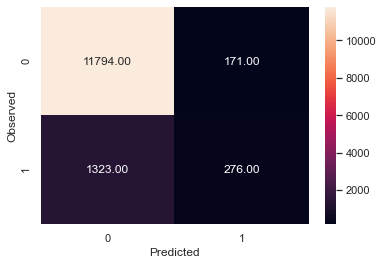

In [45]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
draw_cm(y_test,y_predict)

In [46]:
r_LR = recall_score(y_test,y_predict)
print(r_LR)

0.1726078799249531


In [47]:
p_LR = precision_score(y_test,y_predict)
print(p_LR)

0.6174496644295302


In [48]:
f1_LR = f1_score(y_test,y_predict)
print(f1_LR)

0.26979472140762467


In [49]:
roc_LR=roc_auc_score(y_test,y_predict)
print(roc_LR)

0.5791580979231953


In [50]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': acc_LR, 'Recall Score':r_LR, 'Precision Score':p_LR,
                          'f1 Score':f1_LR,'ROC AUC Score':roc_LR})
resultsDf = resultsDf[['Method', 'accuracy','Recall Score','Precision Score','f1 Score','ROC AUC Score']]
resultsDf


,Method,accuracy,Recall Score,Precision Score,f1 Score,ROC AUC Score
0,Logistic Regression,0.89,0.17,0.62,0.27,0.58


### Creating decision tress model using “entropy” method of finding the split columns and fit it to training data.

In [51]:
# using depth of 4
model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=400)
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=400)

In [52]:
print("Train: %.2f" % model_entropy.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(x_test, y_test))  # performance on test data

Train: 0.89
Test: 0.89


### Visualizing the tree

In [53]:
y_train['Target'].value_counts()

0    27957
1     3690
Name: Target, dtype: int64

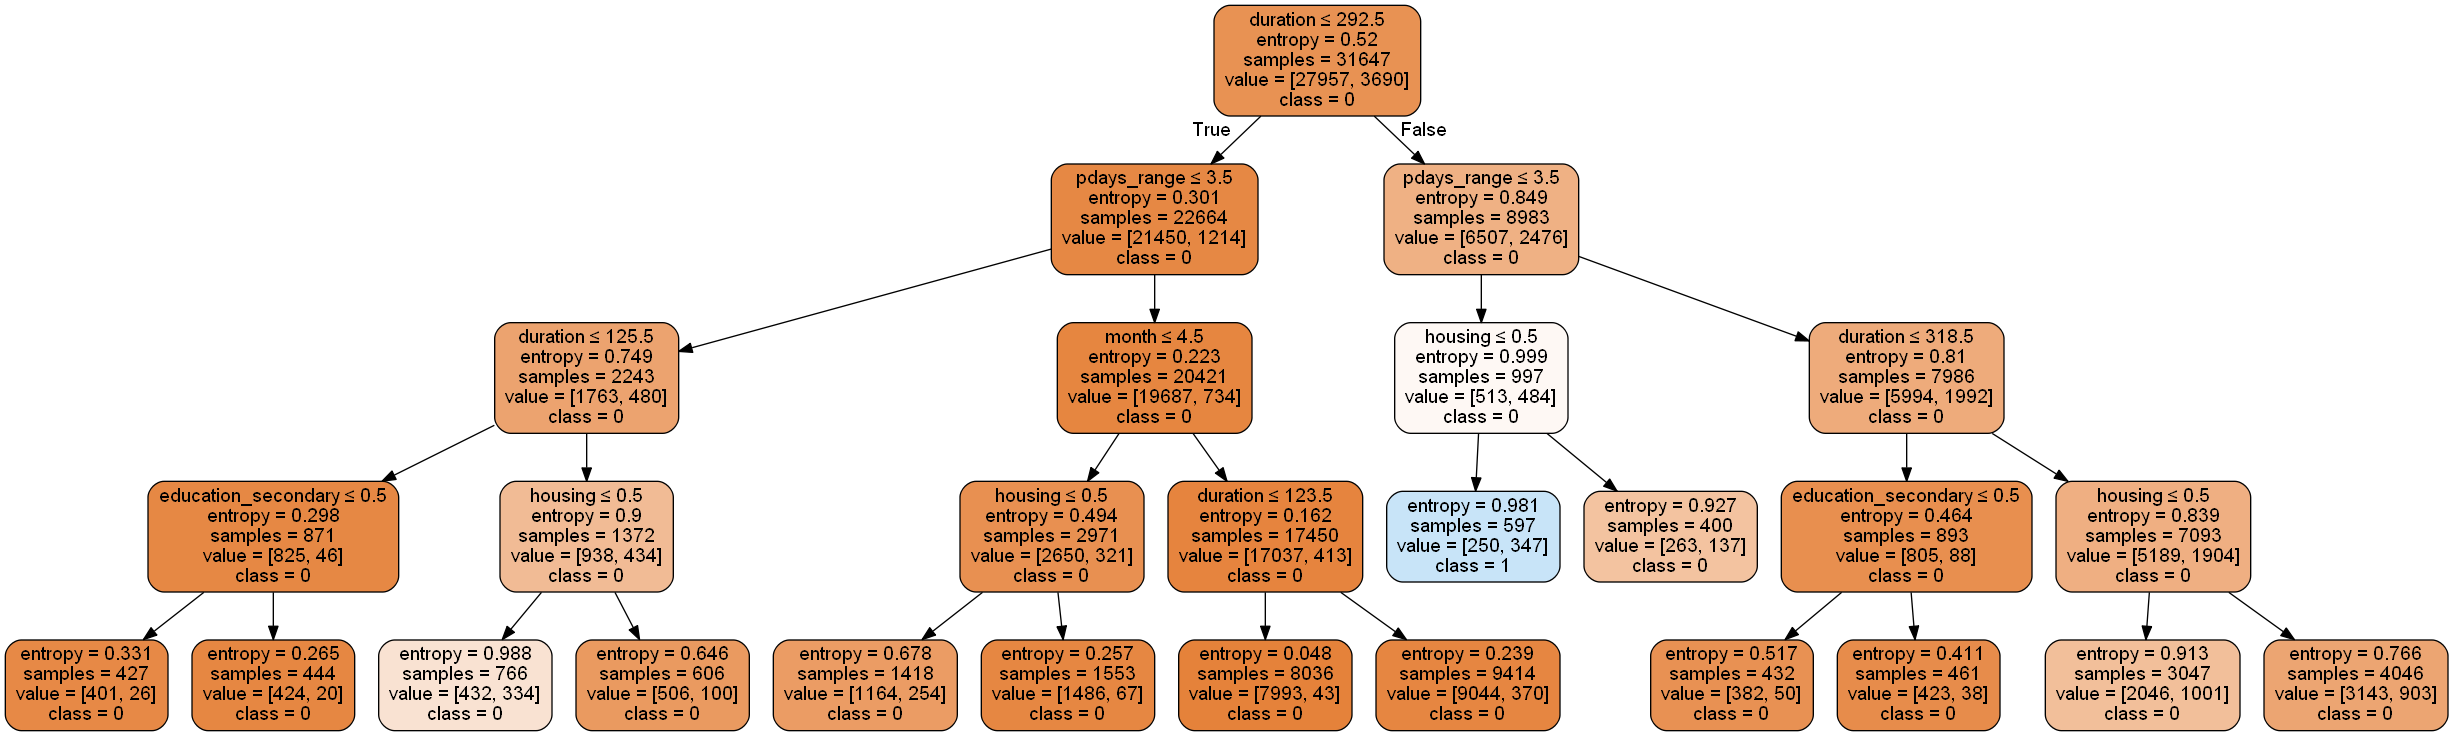

In [54]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydot
from sklearn.tree import DecisionTreeRegressor
dot_data = StringIO()

export_graphviz(model_entropy, out_file=dot_data,  filled=True, rounded=True, special_characters=True, 
                feature_names = feature_cols,class_names=['0','1'])
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_png('term_deposit.png')
Image(graph[0].create_png())

In [55]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score
preds_train = model_entropy.predict(x_train)
preds_test = model_entropy.predict(x_test)

acc_DT = accuracy_score(y_test, preds_test)
print(acc_DT)

r_DT = recall_score(y_test,preds_test)
print(r_DT)

p_DT = precision_score(y_test,preds_test)
print(p_DT)

f1_DT = f1_score(y_test,preds_test)
print(f1_DT)

roc_DT=roc_auc_score(y_test,preds_test)
print(roc_DT)

0.8882335594219994
0.11006879299562226
0.654275092936803
0.18843683083511778
0.5511480613536407


### Decision Tree performance

In [56]:
cm = metrics.confusion_matrix(y_test,preds_test,labels=[0,1])
print(cm)

[[11872    93]
 [ 1423   176]]


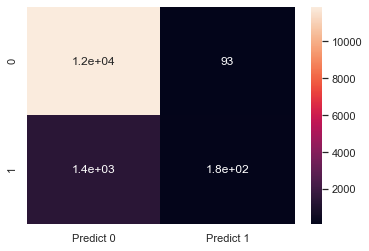

In [57]:
#Confusion Matrix heatmap
df_cm = pd.DataFrame(cm,index = [i for i in ["0","1"]],
                     columns = [i for i in ["Predict 0","Predict 1"]])
df_cm
sns.heatmap(df_cm, annot=True);

c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


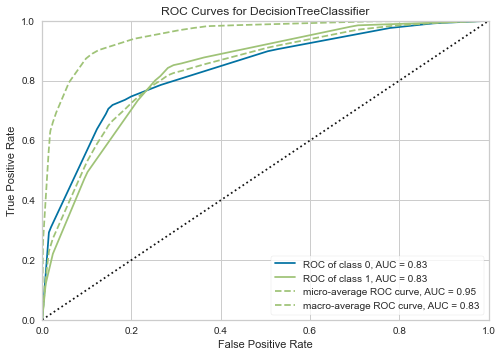

In [58]:
# Visualize model performance with yellowbrick library
from yellowbrick.classifier import ROCAUC, ClassificationReport
roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [59]:
#df1.drop(['ProbTarget_0','ProbTarget_1'],axis=1,inplace=True)

In [60]:
#Predict Probability
features = [col for col in df1.columns if col != 'Target']
df1['ProbTarget_0'] = model_entropy.predict_proba(df1[features])[:,0]
df1['ProbTarget_1'] = model_entropy.predict_proba(df1[features])[:,1]

df1.head(10)



,default,housing,loan,month,duration,campaign,Target,age_range,pdays_range,balance_range,job_employed,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,ProbTarget_0,ProbTarget_1
0,0,1,0,5,261.00,1.00,0,4,7,1,1,0,0,1,0,0,0,1,0.96,0.04
1,0,1,0,5,151.00,1.00,0,3,7,1,1,0,0,0,1,0,1,0,0.96,0.04
2,0,1,1,5,103.00,1.00,0,2,7,1,1,0,0,1,0,0,1,0,0.99,0.01
3,0,1,0,5,103.00,1.00,0,3,7,1,1,0,0,1,0,1,0,0,0.99,0.01
4,0,0,0,5,198.00,1.00,0,2,7,1,0,1,0,0,1,1,0,0,0.96,0.04
5,0,1,0,5,139.00,1.00,0,2,7,1,1,0,0,1,0,0,0,1,0.96,0.04
6,0,1,1,5,217.00,1.00,0,1,7,1,1,0,0,0,1,0,0,1,0.96,0.04
7,1,1,0,5,319.00,1.00,0,3,7,1,1,0,1,0,0,0,0,1,0.78,0.22
8,0,1,0,5,103.00,1.00,0,4,7,1,0,1,0,1,0,1,0,0,0.99,0.01
9,0,1,0,5,103.00,1.00,0,3,7,1,1,0,0,0,1,0,1,0,0.99,0.01


In [61]:
## Calculating feature importance

feat_importance = model_entropy.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, model_entropy.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.65
pdays_range,0.20
housing,0.08
month,0.07
education_secondary,0.00
default,0.00
marital_divorced,0.00
education_primary,0.00
marital_single,0.00
marital_married,0.00


### Fields duration, pdays_range, housing and month are contributing in predicting Target

In [62]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT, 'Recall Score':r_DT, 'Precision Score':p_DT,
                          'f1 Score':f1_DT,'ROC AUC Score':roc_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf


,Method,accuracy,Recall Score,Precision Score,f1 Score,ROC AUC Score
0,Logistic Regression,0.89,0.17,0.62,0.27,0.58
0,Decision Tree,0.89,0.11,0.65,0.19,0.55


### Appy Random forest model

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 40,min_samples_split=100)
rfcl = rfcl.fit(x_train, y_train)

c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
pred_RF = rfcl.predict(x_test)
acc_RF = accuracy_score(y_test, pred_RF)
print(acc_RF)

0.8918460631082277


In [65]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score

acc_RF = accuracy_score(y_test, pred_RF)
print(acc_RF)

r_RF = recall_score(y_test,pred_RF)
print(r_RF)

p_RF = precision_score(y_test,pred_RF)
print(p_RF)

f1_RF = f1_score(y_test,pred_RF)
print(f1_RF)

roc_RF=roc_auc_score(y_test,pred_RF)
print(roc_RF)

0.8918460631082277
0.15509693558474047
0.6813186813186813
0.25267447784004077
0.5727009959996414


In [66]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': acc_RF, 'Recall Score':r_RF, 'Precision Score':p_RF,
                          'f1 Score':f1_RF,'ROC AUC Score':roc_RF})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,accuracy,Recall Score,Precision Score,f1 Score,ROC AUC Score
0,Logistic Regression,0.89,0.17,0.62,0.27,0.58
0,Decision Tree,0.89,0.11,0.65,0.19,0.55
0,Random Forest,0.89,0.16,0.68,0.25,0.57


c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\yellowbrick\base.py:359: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


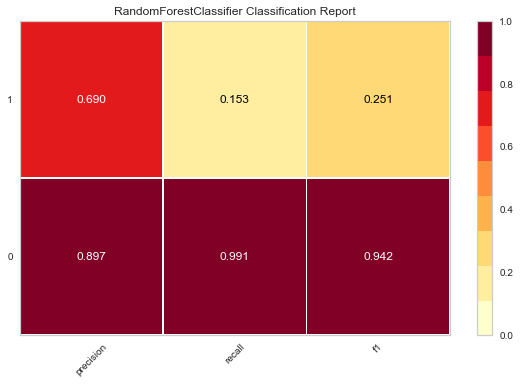

c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\yellowbrick\base.py:359: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


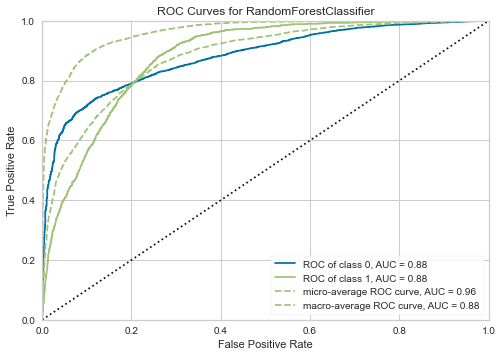

In [67]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 40,min_samples_split=100))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 40,min_samples_split=100))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

### Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [68]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 40, learning_rate=0.5, random_state=5)
abcl = abcl.fit(x_train, y_train)

c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [69]:
pred_AB =abcl.predict(x_test)
acc_AB = accuracy_score(y_test, pred_AB)
print(acc_AB)

0.8885284576820996


In [70]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score

acc_AB = accuracy_score(y_test, pred_AB)
print(acc_AB)

r_AB = recall_score(y_test,pred_AB)
print(r_AB)

p_AB = precision_score(y_test,pred_AB)
print(p_AB)

f1_AB = f1_score(y_test,pred_AB)
print(f1_AB)

roc_AB=roc_auc_score(y_test,pred_AB)
print(roc_AB)

0.8885284576820996
0.1801125703564728
0.588957055214724
0.27586206896551724
0.5816567866408356


In [71]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': acc_AB, 'Recall Score':r_AB, 'Precision Score':p_AB,
                          'f1 Score':f1_AB,'ROC AUC Score':roc_AB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,accuracy,Recall Score,Precision Score,f1 Score,ROC AUC Score
0,Logistic Regression,0.89,0.17,0.62,0.27,0.58
0,Decision Tree,0.89,0.11,0.65,0.19,0.55
0,Random Forest,0.89,0.16,0.68,0.25,0.57
0,Adaboost,0.89,0.18,0.59,0.28,0.58


c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


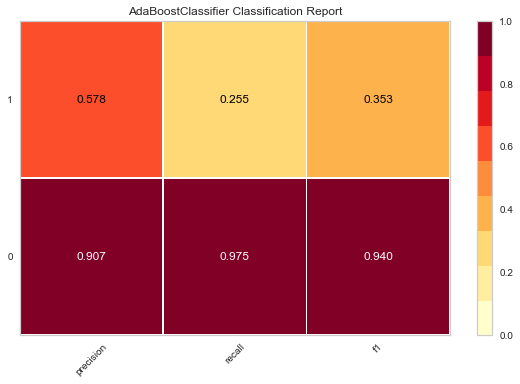

c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


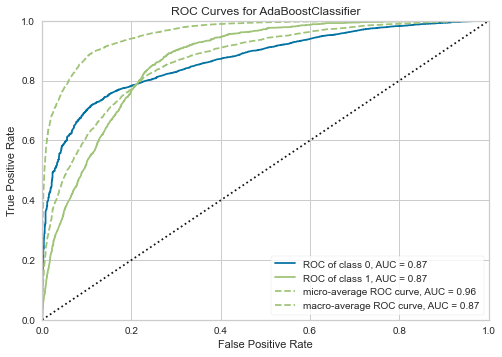

In [72]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators = 40, learning_rate=1, random_state=5))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators = 40, learning_rate=1, random_state=5))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

### Apply Bagging Classifier Algorithm and print the accuracy

In [73]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=40, max_samples= .5, bootstrap=True, oob_score=True, random_state=5)
bgcl = bgcl.fit(x_train, y_train)

c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [74]:
pred_BG = bgcl.predict(x_test)
acc_BG = accuracy_score(y_test, pred_BG)
print(acc_BG)

0.8872751400766735


In [75]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score

acc_BG = accuracy_score(y_test, pred_BG)
print(acc_BG)

r_BG = recall_score(y_test,pred_BG)
print(r_BG)

p_BG = precision_score(y_test,pred_BG)
print(p_BG)

f1_BG = f1_score(y_test,pred_BG)
print(f1_BG)

roc_BG=roc_auc_score(y_test,pred_BG)
print(roc_BG)

0.8872751400766735
0.3233270794246404
0.5363070539419087
0.4034334763948498
0.6429840578903394


In [76]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': acc_BG, 'Recall Score':r_BG, 'Precision Score':p_BG,
                          'f1 Score':f1_BG,'ROC AUC Score':roc_BG})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf


,Method,accuracy,Recall Score,Precision Score,f1 Score,ROC AUC Score
0,Logistic Regression,0.89,0.17,0.62,0.27,0.58
0,Decision Tree,0.89,0.11,0.65,0.19,0.55
0,Random Forest,0.89,0.16,0.68,0.25,0.57
0,Adaboost,0.89,0.18,0.59,0.28,0.58
0,Bagging,0.89,0.32,0.54,0.40,0.64


c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


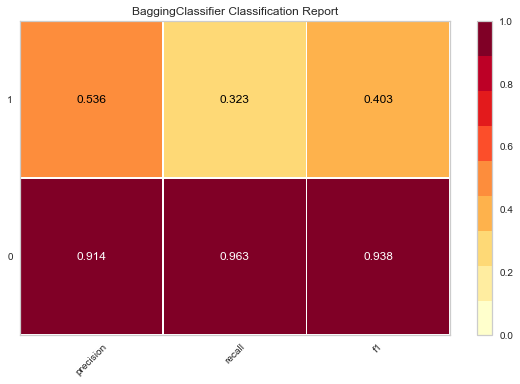

c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


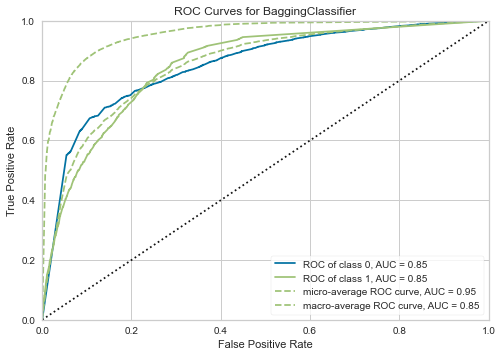

In [77]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=40, max_samples= .5, bootstrap=True, oob_score=True, random_state=5))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=40, max_samples= .5, bootstrap=True, oob_score=True, random_state=5))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 40, learning_rate = 0.5, random_state=5)
gbcl = gbcl.fit(x_train, y_train)

c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [79]:
pred_GB = gbcl.predict(x_test)
acc_GB = accuracy_score(y_test, pred_GB)
print(acc_GB)

0.8961958124447066


In [80]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score


acc_GB = accuracy_score(y_test, pred_GB)
print(acc_GB)

r_GB = recall_score(y_test,pred_GB)
print(r_GB)

p_GB = precision_score(y_test,pred_GB)
print(p_GB)

f1_GB = f1_score(y_test,pred_GB)
print(f1_GB)

roc_GB=roc_auc_score(y_test,pred_GB)
print(roc_GB)

0.8961958124447066
0.2689180737961226
0.6427503736920778
0.37918871252204583
0.6244715734630425


In [81]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': acc_GB, 'Recall Score':r_GB, 'Precision Score':p_GB,
                          'f1 Score':f1_GB,'ROC AUC Score':roc_GB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,accuracy,Recall Score,Precision Score,f1 Score,ROC AUC Score
0,Logistic Regression,0.89,0.17,0.62,0.27,0.58
0,Decision Tree,0.89,0.11,0.65,0.19,0.55
0,Random Forest,0.89,0.16,0.68,0.25,0.57
0,Adaboost,0.89,0.18,0.59,0.28,0.58
0,Bagging,0.89,0.32,0.54,0.40,0.64
0,Gradient Boost,0.90,0.27,0.64,0.38,0.62


c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


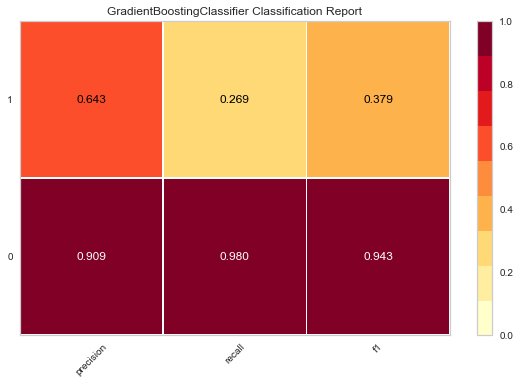

c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


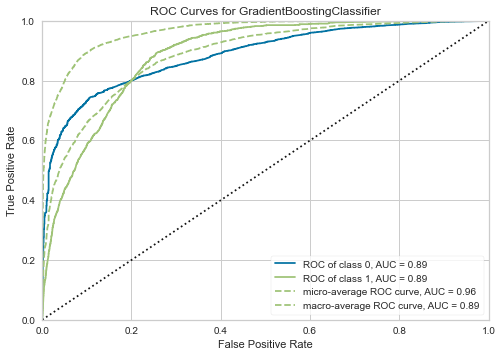

In [82]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 40, learning_rate = 0.5, random_state=5))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 40, learning_rate = 0.5, random_state=5))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 40, learning_rate = 0.5, random_state=5)
xgb = xgb.fit(x_train, y_train)

c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [84]:
pred_XGB = xgb.predict(x_test)
acc_XGB = accuracy_score(y_test, pred_GB)
print(acc_XGB)

0.8961958124447066


In [85]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score


acc_XGB = accuracy_score(y_test, pred_XGB)
print(acc_XGB)

r_XGB = recall_score(y_test,pred_XGB)
print(r_XGB)

p_XGB = precision_score(y_test,pred_XGB)
print(p_XGB)

f1_XGB = f1_score(y_test,pred_XGB)
print(f1_XGB)

roc_XGB=roc_auc_score(y_test,pred_XGB)
print(roc_XGB)

0.8950162194043055
0.3064415259537211
0.6086956521739131
0.40765391014975044
0.6400573697466055


In [86]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['XG Boost'], 'accuracy': acc_XGB, 'Recall Score':r_XGB, 'Precision Score':p_XGB,
                          'f1 Score':f1_XGB,'ROC AUC Score':roc_XGB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf


,Method,accuracy,Recall Score,Precision Score,f1 Score,ROC AUC Score
0,Logistic Regression,0.89,0.17,0.62,0.27,0.58
0,Decision Tree,0.89,0.11,0.65,0.19,0.55
0,Random Forest,0.89,0.16,0.68,0.25,0.57
0,Adaboost,0.89,0.18,0.59,0.28,0.58
0,Bagging,0.89,0.32,0.54,0.40,0.64
0,Gradient Boost,0.90,0.27,0.64,0.38,0.62
0,XG Boost,0.90,0.31,0.61,0.41,0.64


c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\771337\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


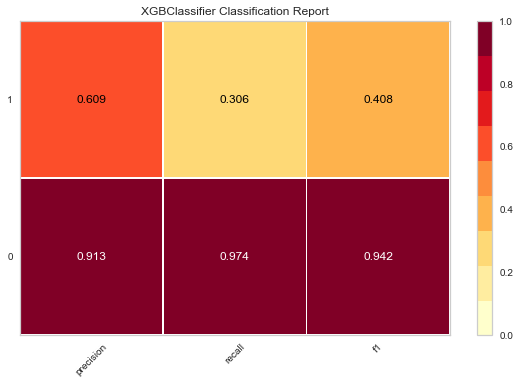

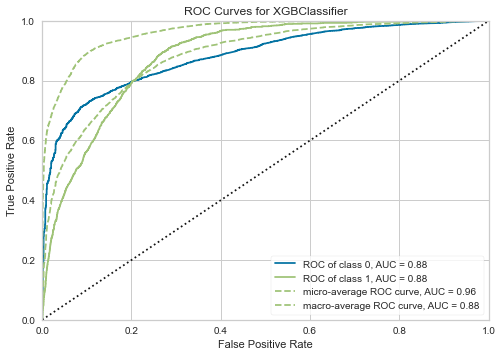

In [87]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(XGBClassifier(n_estimators = 40, learning_rate = 0.5, random_state=5))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(XGBClassifier(n_estimators = 40, learning_rate = 0.5, random_state=5))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

### For this dataset, Bagging, XG Boost & Gradient Boost models give the best results on test predictions

In [88]:
resultsDf

,Method,accuracy,Recall Score,Precision Score,f1 Score,ROC AUC Score
0,Logistic Regression,0.89,0.17,0.62,0.27,0.58
0,Decision Tree,0.89,0.11,0.65,0.19,0.55
0,Random Forest,0.89,0.16,0.68,0.25,0.57
0,Adaboost,0.89,0.18,0.59,0.28,0.58
0,Bagging,0.89,0.32,0.54,0.40,0.64
0,Gradient Boost,0.90,0.27,0.64,0.38,0.62
0,XG Boost,0.90,0.31,0.61,0.41,0.64
